In [2]:
#Imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 


In [2]:
#this changes global printing settings for Pandas here to make it more readable!
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

pd.reset_option('all')

html.border has been deprecated, use display.html.border instead
(currently both are identical)


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\Kuba\Anacondanew\lib\site-packages\pandas\core\config.py:619: FutureWarning: html.border has been deprecated, use display.html.border instead
(currently both are identical)

  warnings.warn(d.msg, FutureWarning)
C:\Users\Kuba\Anacondanew\lib\site-packages\pandas\core\config.py:619: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


1: PREPROCESSING

In [3]:
#read data from csv
data = pd.read_csv(r'\Users\Kuba\Desktop\Sports Analytics Study\ufcdataset\data.csv') #get filename

In [4]:
#preview of data inside the dataframe
data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [5]:
#a few metrics of the dataframe
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2301.000000,2301.000000,2318.000000,2306.000000,1647.000000,1647.000000,1647.000000,1647.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.391286,0.744607,31.776184,177.327249,2120.001726,73.699480,0.074681,1.103825,0.577413,3.852459,...,251.411111,33.644444,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704
std,2.539978,1.145596,4.165267,8.807620,705.089725,15.425347,0.305691,1.537946,1.049758,5.261864,...,197.588561,75.756504,100.516057,25.786323,13.039241,12.810181,39.171198,199.940529,20.941919,224.848078
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,1910.250000,61.000000,0.000000,0.000000,0.000000,0.000000,...,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,178.000000
50%,2.000000,0.000000,31.000000,177.000000,2230.000000,70.000000,0.000000,1.000000,0.000000,2.000000,...,222.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,258.500000,0.000000,296.500000
75%,4.000000,1.000000,35.000000,182.000000,2709.000000,84.000000,0.000000,2.000000,1.000000,5.000000,...,299.000000,34.000000,98.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,364.000000
max,14.000000,10.000000,48.000000,213.000000,3196.000000,120.000000,3.000000,13.000000,8.000000,47.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [6]:
#this makes a new list of all of the columns in the dataframe
col_list = data.columns.tolist()
#this little bit of code prints out all of the columns in the dataframe
for i in col_list:
    print(i)

BPrev
BStreak
B_Age
B_Height
B_HomeTown
B_ID
B_Location
B_Name
B_Weight
B__Round1_Grappling_Reversals_Landed
B__Round1_Grappling_Standups_Landed
B__Round1_Grappling_Submissions_Attempts
B__Round1_Grappling_Takedowns_Attempts
B__Round1_Grappling_Takedowns_Landed
B__Round1_Strikes_Body Significant Strikes_Attempts
B__Round1_Strikes_Body Significant Strikes_Landed
B__Round1_Strikes_Body Total Strikes_Attempts
B__Round1_Strikes_Body Total Strikes_Landed
B__Round1_Strikes_Clinch Body Strikes_Attempts
B__Round1_Strikes_Clinch Body Strikes_Landed
B__Round1_Strikes_Clinch Head Strikes_Attempts
B__Round1_Strikes_Clinch Head Strikes_Landed
B__Round1_Strikes_Clinch Leg Strikes_Attempts
B__Round1_Strikes_Clinch Leg Strikes_Landed
B__Round1_Strikes_Clinch Significant Kicks_Attempts
B__Round1_Strikes_Clinch Significant Kicks_Landed
B__Round1_Strikes_Clinch Significant Punches_Attempts
B__Round1_Strikes_Clinch Significant Punches_Landed
B__Round1_Strikes_Clinch Significant Strikes_Attempts
B__Round1_

In [4]:
processed_data = pd.read_csv(r'\Users\KubaWiszowaty\Desktop\Data Science\Sports Analytics Study\ufcdatasetpreprocessed_data.csv') #get filename

processed_data.head()

FileNotFoundError: [Errno 2] File \Users\KubaWiszowaty\Desktop\Data Science\Sports Analytics Study\ufcdatasetpreprocessed_data.csv does not exist: '\\Users\\KubaWiszowaty\\Desktop\\Data Science\\Sports Analytics Study\\ufcdatasetpreprocessed_data.csv'

In [8]:
#this makes a new list of all of the columns in the dataframe
pro_col_list = processed_data.columns.tolist()
#this little bit of code prints out all of the columns in the dataframe
for i in pro_col_list:
    print(i)
print(len(pro_col_list))

Winner
title_bout
no_of_rounds
B_current_lose_streak
B_current_win_streak
B_draw
B_avg_BODY_att
B_avg_BODY_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_DISTANCE_att
B_avg_DISTANCE_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_KD
B_avg_LEG_att
B_avg_LEG_landed
B_avg_PASS
B_avg_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_att
B_avg_TD_landed
B_avg_TD_pct
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_longest_win_streak
B_losses
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_opp_KD
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_opp_PASS
B_avg_opp_REV
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_opp_SIG_STR_pct
B_avg_opp_SUB_ATT
B_avg_opp_TD_att
B_avg_opp_TD_landed
B_avg_opp_TD_pct
B_avg_opp_TOTAL_STR_att
B_avg_opp_TOTAL_STR_land

In [9]:
#This block of code is here to check to make sure there are no 'no contests', or fights where the
#judges could not decide a winner

#this is done to make sure that we can one hot encode later/ encode the Red and Blue into a value
#that our k-means algorithm can understand

limit_cols_df = processed_data.iloc[:,0:2]
#limit_cols_df.head()
limit_cols_df = limit_cols_df.loc[limit_cols_df['Winner'] != "Red"]
limit_cols_df = limit_cols_df.loc[limit_cols_df['Winner'] != "Blue"]
print(limit_cols_df)

Empty DataFrame
Columns: [Winner, title_bout]
Index: []


In [10]:
data_clean = data #we keep the original pandas dataframe in case we need it later with original columns etc, we will work with data_clean for now

#this part removes columns seen as uneccesary for grouping UFC fighters
data_clean = data_clean.drop(['B_HomeTown', 'R_HomeTown'], axis=1)
print("Fighter Preview:\n" + "*"*96)
print(data_clean.iloc[0:5 , 2:9])

Fighter Preview:
************************************************************************************************
   B_Age  B_Height  B_ID                       B_Location            B_Name  \
0   38.0     193.0   808        Amsterdam The Netherlands  Alistair Overeem   
1   36.0     172.0  1054  Chicago, Illinois United States     Ricardo Lamas   
2   39.0     167.0   959       Sacramento, California USA      Urijah Faber   
3   33.0     167.0  1056                San Diego, CA USA    Danny Martinez   
4   36.0     185.0  2005              Southampton England        Tom Watson   

   B_Weight  B__Round1_Grappling_Reversals_Landed  
0     120.0                                   NaN  
1      65.0                                   NaN  
2      61.0                                   NaN  
3      56.0                                   NaN  
4      84.0                                   NaN  


In [11]:
# how to get rid of all the rows which contain null variables in general
print('og shape:', processed_data.shape)

new_df = processed_data.dropna()

# if you pass nothing (or axis=0) then it drops rows with null records
# if you pass axis=1 into the function then it drops columns with null records

print('new shape', processed_data.shape)

og shape: (3592, 160)
new shape (3592, 160)


In [12]:

data_le = pd.read_csv(r'\Users\Kuba\Desktop\Sports Analytics Study\ufcdataset\preprocessed_data_le.csv') 
print(data_le.dtypes)
processed_data['Winner'] = processed_data.Winner.astype('category')

Winner                                  int64
title_bout                               bool
no_of_rounds                            int64
B_current_lose_streak                   int64
B_current_win_streak                    int64
B_draw                                  int64
B_avg_BODY_att                        float64
B_avg_BODY_landed                     float64
B_avg_CLINCH_att                      float64
B_avg_CLINCH_landed                   float64
B_avg_DISTANCE_att                    float64
B_avg_DISTANCE_landed                 float64
B_avg_GROUND_att                      float64
B_avg_GROUND_landed                   float64
B_avg_HEAD_att                        float64
B_avg_HEAD_landed                     float64
B_avg_KD                              float64
B_avg_LEG_att                         float64
B_avg_LEG_landed                      float64
B_avg_PASS                            float64
B_avg_REV                             float64
B_avg_SIG_STR_att                 

In [13]:
#print(data_le)

In [14]:
#this code takes our nominal value labels from our preprocessed dataset and makes them numeric
#le = preprocessing.LabelEncoder()
#le.fit(["Red","Blue"])
#list(le.classes_)
#le.transform(["Red", "Blue"], processed_data)
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(processed_data.winner)
#print(integer_encoded)


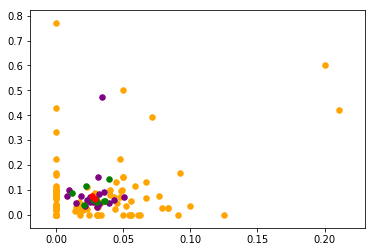

In [15]:
#and finally with 100 clusters 
kmeans = KMeans(n_clusters=100, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)
centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 159], kmeans.cluster_centers_[:, 1], s=30, c='orange')

#this time with 18 clusters 
kmeans = KMeans(n_clusters=18, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)
centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 159], kmeans.cluster_centers_[:, 1], s=30, c='purple')

#this time with 9 clusters 
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)
centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 159], kmeans.cluster_centers_[:, 1], s=30, c='green')

#trying this time with 2 clusters:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)
centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:,159], kmeans.cluster_centers_[:, 1], s=30, c='red')


plt.show()

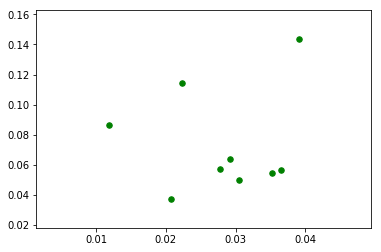

In [16]:
#ok! so here is the meat of the actually
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)

centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 159], kmeans.cluster_centers_[:, 1], s=30, c='green')
plt.show()

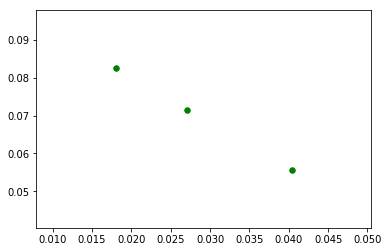

In [17]:
#trying this time with 3 clusters:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)

centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 159], kmeans.cluster_centers_[:, 1], s=30, c='green')
plt.show()

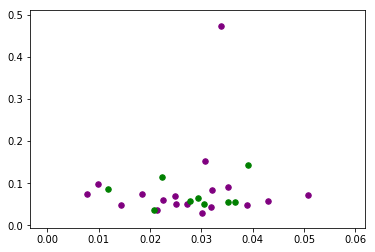

In [18]:

#this time with 9 clusters again as reference
kmeans = KMeans(n_clusters=18, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)
centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 159], kmeans.cluster_centers_[:, 1], s=30, c='purple')

#this time with 3 clusters again as reference
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)
centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 159], kmeans.cluster_centers_[:, 1], s=30, c='green')

plt.show()

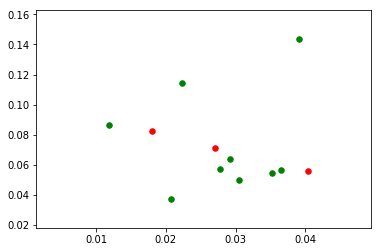

In [19]:

#this time with 9 clusters again as reference
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)
centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 159], kmeans.cluster_centers_[:, 1], s=30, c='green')

#this time with 3 clusters again as reference
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)
centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 159], kmeans.cluster_centers_[:, 1], s=30, c='red')

plt.show()

In [20]:
#this time with 9 clusters again as reference
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)
centers = kmeans.cluster_centers_
print(centers)

[[0.39171975 0.11464968 3.31528662 ... 0.82165605 0.15605096 0.02229299]
 [0.28514851 0.05742574 3.2019802  ... 0.77425743 0.1980198  0.02772277]
 [0.27862595 0.04961832 3.10305344 ... 0.72519084 0.22137405 0.03053435]
 ...
 [0.29875519 0.0373444  3.08298755 ... 0.75103734 0.22821577 0.02074689]
 [0.31229236 0.05647841 3.19269103 ... 0.72093023 0.2358804  0.03654485]
 [0.40900196 0.05479452 3.19569472 ... 0.72994129 0.23483366 0.03522505]]


2B. Inertia & Elbow Plots

In [21]:
inertias = [] 
mapping2 = {} 
K = range(1,36) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeanModel.fit(data_le)     
    inertias.append(kmeanModel.inertia_)  
    mapping2[k] = kmeanModel.inertia_ 

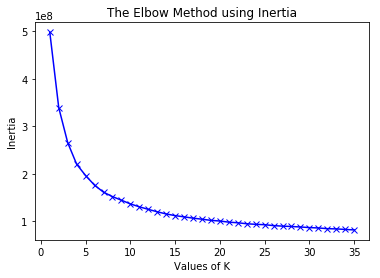

In [22]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [23]:
#this time with 9 clusters again 
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_le)
centers = kmeans.cluster_centers_

In [24]:
#this is our euclidean function, customized for our data    
def euclidean(x):
    summation = 0
    centerslist = []
    for i in range (1,len(centers)):
        distance = 0
        for j in range(len(centers[1])):
            summation = (x.values[j] - centers[i,j])**2 #df.loc[row,column]
            summation = summation**.5
            #print(summation)
            distance = distance + summation
        centerslist.append([distance,i]) #y is the closest center
    return min(centerslist)

##################################################################################################
#this is the class of fight we would like to filter for
class_num = 6
##################################################################################################


#fighter distance loop    
fight_closest_center = []
#this is where we loop through all of the fights
for r in range(0,len(data)):
    fight_closest_center.append(euclidean(data_le.loc[r]))
    
    
    if(min(fight_closest_center)[1]) == class_num :
        print("Closest center to row " + ": ")
        print(min(fight_closest_center[:]))
        print("Blue Corner: " + data.loc[r,'B_Name'] + "\t Red Corner: " + (data.loc[r,'R_Name'] + "\t\t\t Winner: "+ data.loc[r,'winner']))
        print("\n")
    fight_closest_center = []
    

Closest center to row : 
[699.7088204522353, 6]
Blue Corner: Elias Silverio	 Red Corner: Isaac Vallie-Flagg			 Winner: blue


Closest center to row : 
[1184.400280357389, 6]
Blue Corner: Mike Easton	 Red Corner: TJ Dillashaw			 Winner: red


Closest center to row : 
[886.0789521688359, 6]
Blue Corner: Louis Smolka	 Red Corner: Alptekin Ozkilic			 Winner: blue


Closest center to row : 
[535.3012446248545, 6]
Blue Corner: Khabib Nurmagomedov	 Red Corner: Rafael dos Anjos			 Winner: blue


Closest center to row : 
[862.0895491353616, 6]
Blue Corner: Yoel Romero	 Red Corner: Brad Tavares			 Winner: blue


Closest center to row : 
[938.4286797780455, 6]
Blue Corner: Ray Borg	 Red Corner: Dustin Ortiz			 Winner: red


Closest center to row : 
[1684.061447681307, 6]
Blue Corner: Scott Jorgensen	 Red Corner: Jussier Formiga			 Winner: red


Closest center to row : 
[769.1383244690154, 6]
Blue Corner: Dan Henderson	 Red Corner: Daniel Cormier			 Winner: red


Closest center to row : 
[1113.186

Closest center to row : 
[829.687768235472, 6]
Blue Corner: Rony Jason	 Red Corner: Dennis Bermudez			 Winner: red


Closest center to row : 
[1080.0808375958643, 6]
Blue Corner: Kyle Bochniak	 Red Corner: Enrique Barzola			 Winner: blue


Closest center to row : 
[711.0970508101686, 6]
Blue Corner: Elizeu Zaleski dos Santos	 Red Corner: Keita Nakamura			 Winner: blue


Closest center to row : 
[1080.981602495819, 6]
Blue Corner: Antonio Silva	 Red Corner: Roy Nelson			 Winner: red


Closest center to row : 
[867.5756161160878, 6]
Blue Corner: Heather Jo Clark	 Red Corner: Alexa Grasso			 Winner: red


Closest center to row : 
[668.8715625278008, 6]
Blue Corner: Max Griffin	 Red Corner: Erick Montano			 Winner: blue


Closest center to row : 
[1475.0654615320395, 6]
Blue Corner: Gegard Mousasi	 Red Corner: Vitor Belfort			 Winner: blue


Closest center to row : 
[762.9596536245924, 6]
Blue Corner: Mark Godbeer	 Red Corner: Justin Ledet			 Winner: red


Closest center to row : 
[463.185

Closest center to row : 
[894.0465903494353, 6]
Blue Corner: Sam Alvey	 Red Corner: Gian Villante			 Winner: blue


Closest center to row : 
[1522.1303834277421, 6]
Blue Corner: Cyril Asker	 Red Corner: Tai Tuivasa			 Winner: red


Closest center to row : 
[1177.2049217843526, 6]
Blue Corner: Alexandre Pantoja	 Red Corner: Brandon Moreno			 Winner: blue


Closest center to row : 
[964.9508858269369, 6]
Blue Corner: Craig White	 Red Corner: Neil Magny			 Winner: red


Closest center to row : 
[1016.1285596719097, 6]
Blue Corner: Tyson Pedro	 Red Corner: Ovince Saint Preux			 Winner: red


Closest center to row : 
[1050.462698627507, 6]
Blue Corner: Jodie Esquibel	 Red Corner: Jessica Aguilar			 Winner: red


Closest center to row : 
[730.537656820416, 6]
Blue Corner: Alex Morono	 Red Corner: Jordan Mein			 Winner: red


Closest center to row : 
[893.6273295785024, 6]
Blue Corner: Tecia Torres	 Red Corner: Joanna Jedrzejczyk			 Winner: red


Closest center to row : 
[916.6020487926648, 6

In [25]:
def find_fighter(name):

#fighter distance loop    
    fight_closest_center = []
#this is where we loop through all of the fights
    for r in range(0,len(data)):
        fight_closest_center.append(euclidean(data_le.loc[r]))
        
        if(data.loc[r,'B_Name'] == name):
            print("Closest center to row " + ": ")
            print(min(fight_closest_center[:]))
            print("Blue Corner: " + data.loc[r,'B_Name'] + "\t Red Corner: " + (data.loc[r,'R_Name'] + "\t\t\t Winner: "+ data.loc[r,'winner']))
            print("\n")
        fight_closest_center = []
    
        

In [26]:
find_fighter("Donald Cerrone")
find_fighter("Khabib Nurmagomedov")

Closest center to row : 
[979.6743143735249, 7]
Blue Corner: Donald Cerrone	 Red Corner: Rafael dos Anjos			 Winner: red


Closest center to row : 
[801.3597391978359, 3]
Blue Corner: Donald Cerrone	 Red Corner: Rick Story			 Winner: blue


Closest center to row : 
[982.3736027703061, 8]
Blue Corner: Donald Cerrone	 Red Corner: Robbie Lawler			 Winner: red


Closest center to row : 
[535.3012446248545, 6]
Blue Corner: Khabib Nurmagomedov	 Red Corner: Rafael dos Anjos			 Winner: blue




3. CONCLUSION

 3A. Conclusions drawn from data
 
 From all the data crunching done, we are able to break down each of the classes of fights and given them unofficial category names:
 
 Class 1 Fights: Long hard fought decisions
 Class 2 Fights: Fast, Standup knockouts
 Class 3 Fights: Championship fights without knockouts
 Class 4 Fights: 3 Round non championship decisions with heavy striking
 Class 5 Fights: 3 Round non championship knockouts late in 2nd and 3rd round
 Class 6 Fights: 3 Round non championship fights with heavy grappling, ground and pound
 Class 7 Fights: 3 Round non championships fights heavily one sided
 Class 8 Fights: 3 round non championship fights with takedowns and high percetnage strikes
 
 
 We're also able to take very popular fighters and pull up all their fights and "classify" their fighting style based on how they fight on the classes above. Only fighters with more than 3 fights in the dataset are ones we are going to classify here.
 